# Predictive Modelling of customer bookings (British Airways) 
Target variable: booking_complete

In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## 1) EDA

In [3]:
# Check the number of rows and columns in the dataset
data.shape

(50000, 14)

In [4]:
# Check the nullability and data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
# Check the summary statistics of the dataset
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
# Check for missing values in the dataset
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

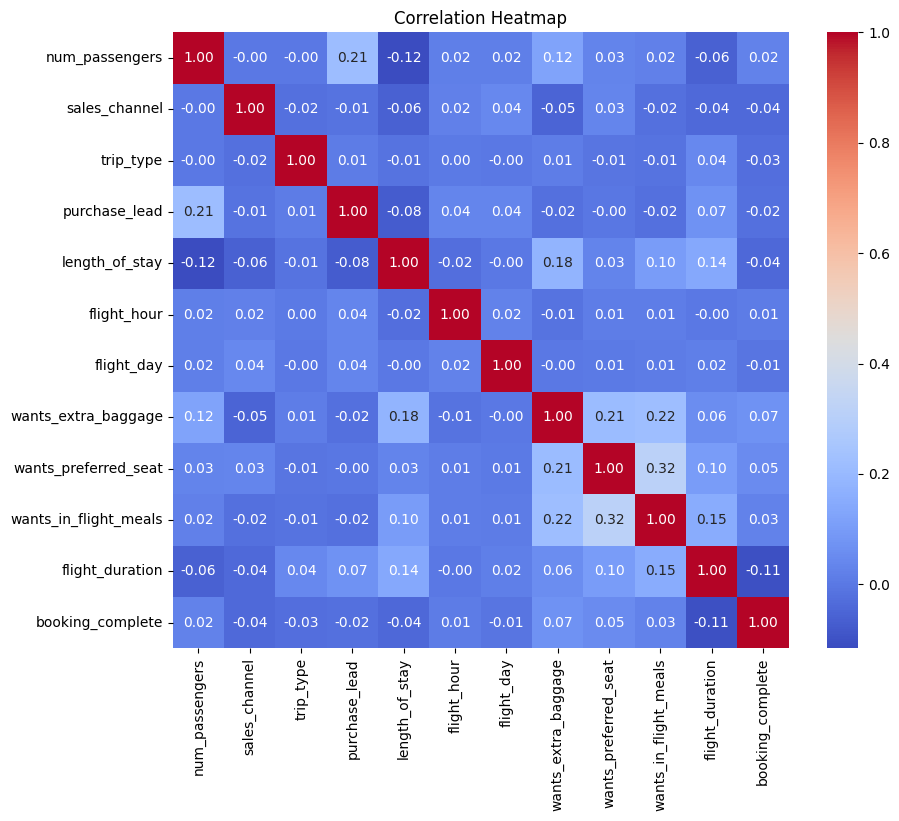

In [29]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
data['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

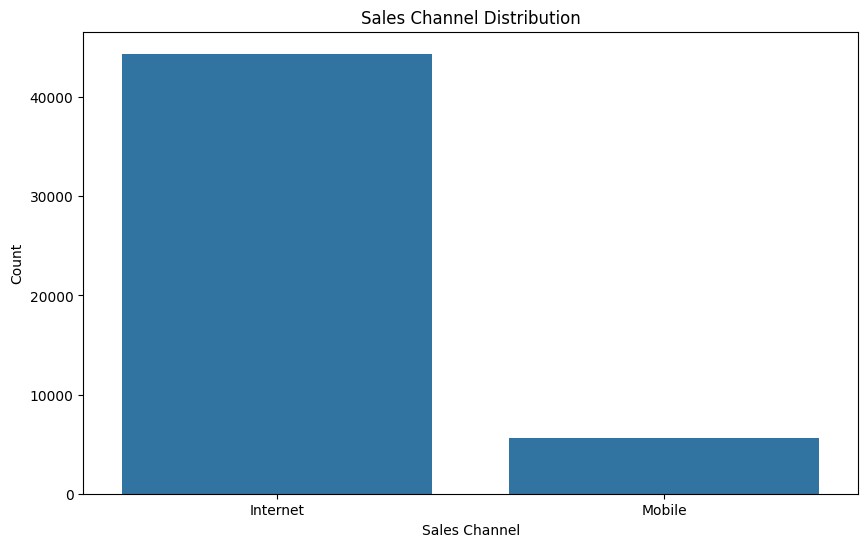

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sales_channel')
plt.title('Sales Channel Distribution')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

In [10]:
mapping1 = {
    "Internet": 1,
    "Mobile": 2
}

data['sales_channel'] = data['sales_channel'].map(mapping1)

In [11]:
data['sales_channel'].unique()

array([1, 2])

In [12]:
data['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

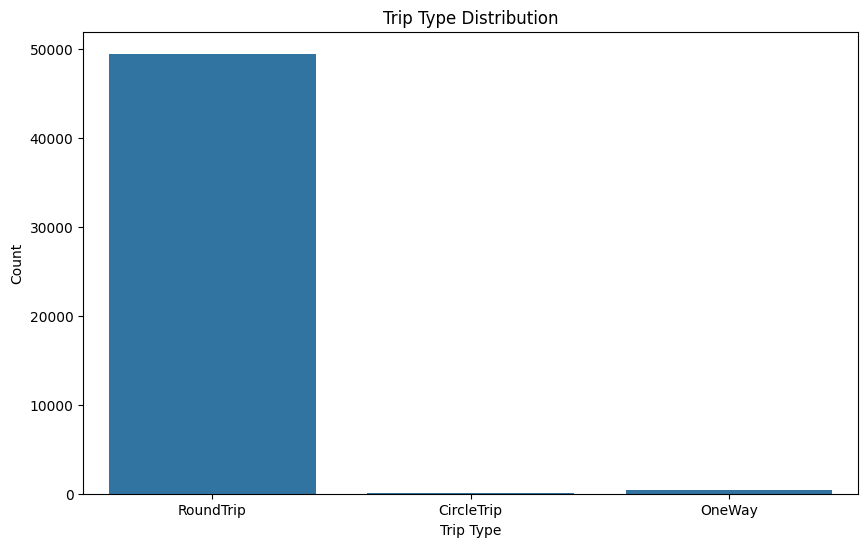

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='trip_type')
plt.title('Trip Type Distribution')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()

In [14]:
mapping2 = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,
}

data['trip_type'] = data['trip_type'].map(mapping2)
data['trip_type'].unique()

array([1, 2, 3])

In [15]:
data['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Ghana                       1
Gibraltar                   1
Guatemala                   1
Algeria                     1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

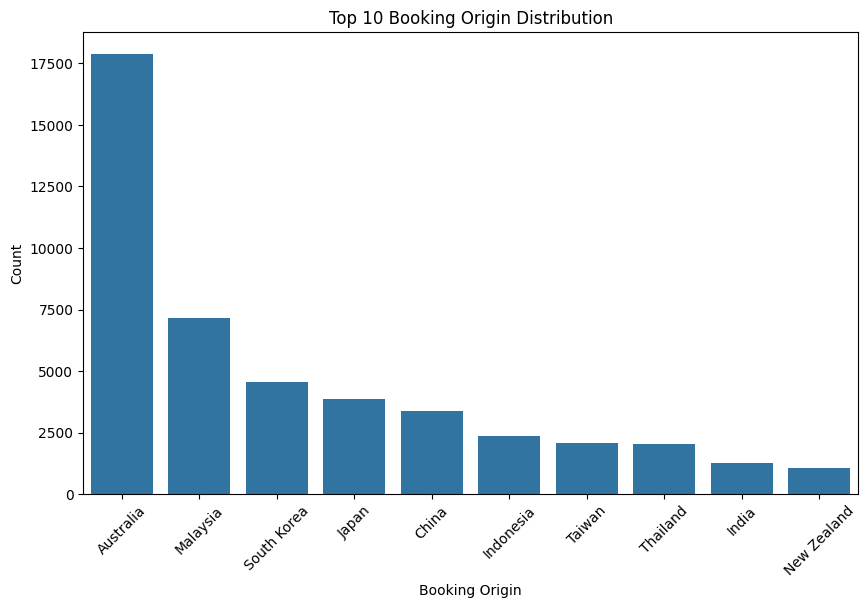

In [16]:
top_10_origins = data['booking_origin'].value_counts().nlargest(10).index

filtered_origin_data = data[data['booking_origin'].isin(top_10_origins)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_origin_data, x='booking_origin', order=top_10_origins)
plt.title('Top 10 Booking Origin Distribution')
plt.xlabel('Booking Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
data['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [18]:
data['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [19]:
# Data Convertion for prediction
mapping3 = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,       
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}

data['flight_day'] = data['flight_day'].map(mapping3)

In [20]:
data['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [21]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


## 2) Training Machine Learning Model

In [ ]:
# Features + Target Selection

features = [
    'num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
    'length_of_stay', 'flight_hour', 'flight_day', 'route',
    'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
    'wants_in_flight_meals', 'flight_duration'
]

target = 'booking_complete'

X = data[features].copy()
y = data[target]

In [24]:
# Encode categorical variables

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [25]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [27]:
# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Evaluate the model
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.8531
Classification report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.55      0.10      0.17      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000

Confusion Matrix: [[8382  122]
 [1347  149]]


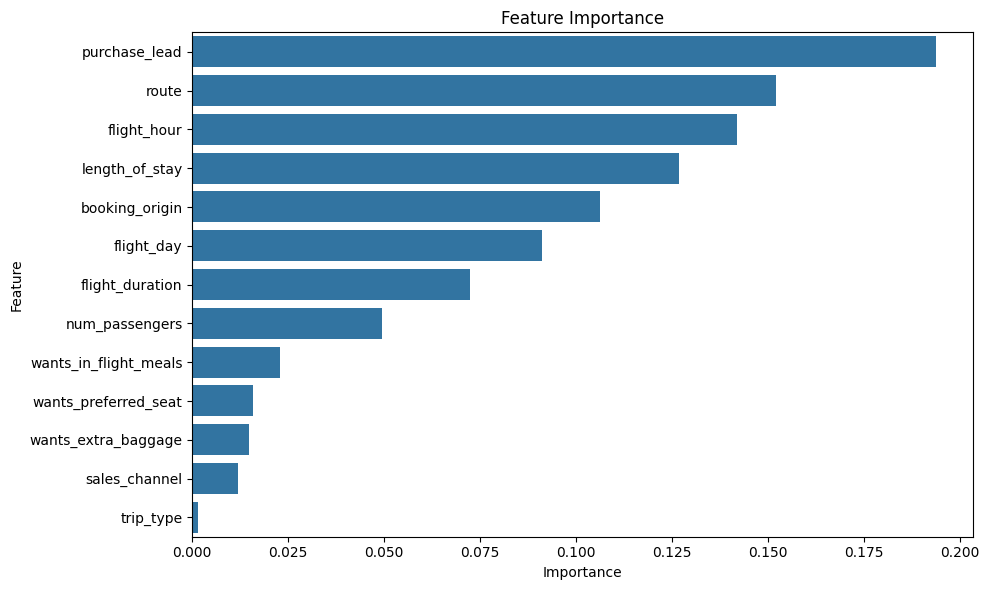

In [30]:
# Feature importance plot
importances = rf.feature_importances_
feature_names = X.columns

# Plot
feat_data = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_data.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_data, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Evaluation:

### Accuracy (0.8531):

The model's overall accuracy is 85.31%, which is generally good, but it might be misleading in cases of class imbalance (where one class is much more frequent than the other).

### Precision, Recall, and F1-score:

Class 0 (Negative class):

Precision: 0.86, Recall: 0.99, F1-score: 0.92 — This indicates that the model is very accurate in predicting the negative class and has a high recall, meaning it correctly identifies almost all negative cases.

Class 1 (Positive class):

Precision: 0.55, Recall: 0.10, F1-score: 0.17 — For the positive class, the model is much less effective, with low recall (only 10% of positive cases are identified) and lower precision (only 55% of positive predictions are correct). This suggests that the model has difficulty detecting positive cases.

### Confusion Matrix:

True negatives: 8382, False positives: 122 — The model correctly predicted 8382 negative cases and incorrectly predicted 122 positive cases.

False negatives: 1347, True positives: 149 — The model missed 1347 positive cases and only correctly predicted 149.

Macro Average:

The macro average values (precision: 0.71, recall: 0.54, F1-score: 0.54) show that, on average, the model's performance is decent but heavily biased toward predicting negative cases.

Weighted Average:

The weighted average values (precision: 0.81, recall: 0.85, F1-score: 0.81) suggest that the model performs reasonably well overall, but the imbalance between the classes affects these metrics.

### Interpretation:
The model is excellent at predicting negative cases (class 0), with high precision and recall. However, it struggles to detect positive cases (class 1), leading to a low recall and F1-score for the positive class.

The imbalance in the dataset (many more negative cases than positive) seems to have skewed the model's ability to accurately predict the minority class.

### Improvement Suggestions:

Class imbalance handling (e.g., oversampling, undersampling, or using class weights) could help improve the model's ability to predict the minority class (positive cases).

Alternative metrics like ROC-AUC or Precision-Recall AUC would be more informative for evaluating performance in imbalanced datasets.